# 向量点击注意力

In [1]:
import torch
import torch.nn.functional as F

x1 = torch.randn(2, 3, 4)
x2 = torch.randn(2, 5, 4)

raw_weights = torch.bmm(x1, x2.transpose(1, 2))
print(raw_weights)

attn_weights = F.softmax(raw_weights, dim=2)
print(attn_weights)

attn_output = torch.bmm(attn_weights, x2)
print(attn_output)

tensor([[[ 0.5581, -0.1522,  0.5414, -2.7451,  3.5380],
         [-1.8462, -0.7459, -0.4466,  1.3910, -2.4597],
         [ 1.4161,  0.2994,  0.2445,  0.4288, -0.1966]],

        [[ 0.4140,  1.2037,  1.6825,  2.9019, -1.6379],
         [-2.9567, -0.4334,  0.7550,  0.4601,  1.6627],
         [ 2.6818,  0.3124, -1.6607,  2.0922,  0.6671]]])
tensor([[[0.0451, 0.0221, 0.0443, 0.0017, 0.8868],
         [0.0294, 0.0882, 0.1190, 0.7475, 0.0159],
         [0.4527, 0.1482, 0.1403, 0.1686, 0.0902]],

        [[0.0528, 0.1164, 0.1879, 0.6361, 0.0068],
         [0.0054, 0.0669, 0.2197, 0.1636, 0.5445],
         [0.5573, 0.0521, 0.0072, 0.3090, 0.0743]]])
tensor([[[-0.5110,  1.5456,  0.7920, -0.1922],
         [ 0.0240, -1.4977, -0.0511, -0.0834],
         [-0.2605, -0.7335,  0.5971, -0.4711]],

        [[-0.4566, -0.7071,  0.5643, -0.4876],
         [ 0.2462, -0.2368,  0.4182,  0.2275],
         [ 0.4755, -1.2205, -0.3008, -0.1270]]])


# 缩放向量点积注意力

In [2]:
import torch
import torch.nn.functional as F

x1 = torch.randn(2, 3, 4)
x2 = torch.randn(2, 5, 4)

raw_weights = torch.bmm(x1, x2.transpose(1, 2))
print(raw_weights)

scale_factor = x1.size(-1)**5
scaled_weights = raw_weights / scale_factor
print(scaled_weights)

attn_weights = F.softmax(raw_weights, dim=2)
print(attn_weights)

attn_output = torch.bmm(attn_weights, x2)
print(attn_output)

tensor([[[-2.2115,  0.2237,  2.6573, -1.6398, -0.3084],
         [-0.7205,  0.4903,  0.5500,  0.0727,  0.1181],
         [-0.7693, -0.6200, -1.7571,  1.3097, -0.2507]],

        [[ 2.4940, -1.8637, -1.2612,  2.0444, -0.9162],
         [ 0.6009,  1.2410,  1.9945, -0.8985,  0.0742],
         [-3.6895, -0.4852,  1.7573, -3.3288, -3.0885]]])
tensor([[[-2.1597e-03,  2.1841e-04,  2.5950e-03, -1.6014e-03, -3.0118e-04],
         [-7.0357e-04,  4.7880e-04,  5.3711e-04,  7.0968e-05,  1.1535e-04],
         [-7.5125e-04, -6.0542e-04, -1.7159e-03,  1.2790e-03, -2.4487e-04]],

        [[ 2.4355e-03, -1.8200e-03, -1.2316e-03,  1.9965e-03, -8.9469e-04],
         [ 5.8679e-04,  1.2119e-03,  1.9477e-03, -8.7743e-04,  7.2462e-05],
         [-3.6030e-03, -4.7384e-04,  1.7161e-03, -3.2508e-03, -3.0161e-03]]])
tensor([[[0.0066, 0.0756, 0.8617, 0.0117, 0.0444],
         [0.0804, 0.2697, 0.2863, 0.1777, 0.1859],
         [0.0819, 0.0951, 0.0305, 0.6549, 0.1376]],

        [[0.5858, 0.0075, 0.0137, 0.3737, 0.0

In [3]:
x1.size(-1)**0.5

2.0

In [4]:
%reset -f
sentences = [
    ["咖哥 喜欢 小冰", "<sos> KaGe likes XiaoBing", "KaGe likes XiaoBing <eos>"],
    ["我 爱 学习 人工智能", "<sos> I love studying AI", "I love studying AI <eos>"],
    ["深度学习 改变 世界", "<sos> DL changed the world", "DL changed the world <eos>"],
    ["自然 语言 处理 很 强大", "<sos> NLP is so powerful", "NLP is so powerful <eos>"],
    ["神经网络 非常 复杂", "<sos> Neural-Nets are complex", "Neural-Nets are complex <eos>"]
]
word_list_cn, word_list_en = [], []
for s in sentences:
    word_list_cn.extend(s[0].split())
    word_list_en.extend(s[1].split())
    word_list_en.extend(s[2].split())
word_list_cn = list(set(word_list_cn))
word_list_en = list(set(word_list_en))

word_2_idx_cn = {w: i for i, w in enumerate(word_list_cn)}
word_2_idx_en = {w: i for i, w in enumerate(word_list_en)}

idx_2_word_cn = {i: w for i, w in enumerate(word_list_cn)}
idx_2_word_en = {i: w for i, w in enumerate(word_list_en)}

voc_size_cn = len(word_list_cn)
voc_size_en = len(word_list_en)

print(f"句子数量: {len(sentences)}")
print(f"中文词汇表大小: {voc_size_cn}")
print(f"英文词汇表大小: {voc_size_en}")
print(f"中文词汇到索引: {word_2_idx_cn}")
print(f"英文词汇到索引: {word_2_idx_en}")

句子数量: 5
中文词汇表大小: 18
英文词汇表大小: 20
中文词汇到索引: {'咖哥': 0, '改变': 1, '学习': 2, '自然': 3, '小冰': 4, '深度学习': 5, '处理': 6, '喜欢': 7, '神经网络': 8, '我': 9, '强大': 10, '爱': 11, '复杂': 12, '人工智能': 13, '很': 14, '世界': 15, '语言': 16, '非常': 17}
英文词汇到索引: {'world': 0, 'love': 1, 'AI': 2, 'powerful': 3, 'I': 4, '<eos>': 5, 'DL': 6, 'is': 7, 'changed': 8, 'so': 9, 'studying': 10, 'are': 11, 'the': 12, 'likes': 13, 'complex': 14, 'Neural-Nets': 15, 'NLP': 16, '<sos>': 17, 'XiaoBing': 18, 'KaGe': 19}


In [5]:
import numpy as np
import torch
import random

def make_data(sentences):
    random_sentence = random.choice(sentences)
    encoder_input = np.array([[word_2_idx_cn[w] for w in random_sentence[0].split()]])
    decoder_input = np.array([[word_2_idx_en[w] for w in random_sentence[1].split()]])
    target = np.array([[word_2_idx_en[w] for w in random_sentence[2].split()]])
    encoder_input = torch.LongTensor(encoder_input)
    decoder_input = torch.LongTensor(decoder_input)
    target = torch.LongTensor(target)
    return encoder_input, decoder_input, target

encoder_input, decoder_input, target = make_data(sentences)

# 1. 定义 Attention 类

In [6]:
import torch.nn as nn

class Attention(nn.Module):
    
    def __init__(self):
        super().__init__()
    
    def forward(self, decoder_context, encoder_context):
        scores = torch.matmul(decoder_context, encoder_context.transpose(-2, -1))
        attn_weights = nn.functional.softmax(scores, dim=-1)
        context = torch.matmul(attn_weights, encoder_context)
        return context, attn_weights

# 2. 重构 Decoder 类

In [7]:
import torch.nn as nn

class Encoder(nn.Module):
    def __init__(self, input_size, hidden_size):
        super().__init__() 
        self.hidden_size = hidden_size
        self.embedding  = nn.Embedding(input_size, hidden_size)
        self.rnn = nn.RNN(hidden_size, hidden_size, batch_first=True)
        
    def forward(self, inputs, hidden):
        embedded = self.embedding(inputs)
        output, hidden = self.rnn(embedded, hidden)
        return output, hidden

class DecoderWithAttention(nn.Module):
    
    def __init__(self, hidden_size, output_size):
        super().__init__()
        self.hidden_size = hidden_size
        self.embedding = nn.Embedding(output_size, hidden_size)
        self.rnn = nn.RNN(hidden_size, hidden_size, batch_first=True)
        self.attention = Attention()
        self.out = nn.Linear(2*hidden_size, output_size)
    
    def forward(self, dec_input, hidden, enc_output):
        embedded = self.embedding(dec_input)
        rnn_output, hidden = self.rnn(embedded, hidden)
        context, attn_weights = self.attention(rnn_output, enc_output)
        dec_output = torch.cat((rnn_output, context), dim=-1)
        dec_output = self.out(dec_output)
        return dec_output, hidden, attn_weights

n_hidden = 128
encoder = Encoder(voc_size_cn, n_hidden)
print(f"编码器: {encoder}")
decoder = DecoderWithAttention(n_hidden, voc_size_en)
print(f"解码器: {decoder}")

编码器: Encoder(
  (embedding): Embedding(18, 128)
  (rnn): RNN(128, 128, batch_first=True)
)
解码器: DecoderWithAttention(
  (embedding): Embedding(20, 128)
  (rnn): RNN(128, 128, batch_first=True)
  (attention): Attention()
  (out): Linear(in_features=256, out_features=20, bias=True)
)


# 重构 Seq2Seq 类

In [8]:
class Seq2Seq(nn.Module):
    
    def __init__(self, encoder, decoder):
        super().__init__()
        self.encoder = encoder
        self.decoder = decoder
        
    def forward(self, encoder_input, hidden, decoder_input):
        encoder_output, encoder_hidden = self.encoder(encoder_input, hidden)
        decoder_hidden = encoder_hidden
        decoder_output, _, attn_weights = self.decoder(decoder_input, decoder_hidden, encoder_output)
        return decoder_output, attn_weights

model = Seq2Seq(encoder, decoder)

print(model)

Seq2Seq(
  (encoder): Encoder(
    (embedding): Embedding(18, 128)
    (rnn): RNN(128, 128, batch_first=True)
  )
  (decoder): DecoderWithAttention(
    (embedding): Embedding(20, 128)
    (rnn): RNN(128, 128, batch_first=True)
    (attention): Attention()
    (out): Linear(in_features=256, out_features=20, bias=True)
  )
)


In [9]:
def train_seq2seq(model, creterion, optimizer, epochs):
    for epoch in range(epochs):
        encoder_input, decoder_input, target = make_data(sentences)
        hidden = torch.zeros(1, encoder_input.size(0), n_hidden)
        optimizer.zero_grad()
        output, _ = model(encoder_input, hidden, decoder_input)
        loss = creterion(output.view(-1, voc_size_en), target.view(-1))
        if (epoch + 1) % 100 == 0:
            print(f"Epoch: {epoch+1}, Loss: {loss:.10f}")
        loss.backward()
        optimizer.step()

epochs = 10000
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
train_seq2seq(model, criterion, optimizer, epochs)

Epoch: 100, Loss: 0.0365854427
Epoch: 200, Loss: 0.0117548853
Epoch: 300, Loss: 0.0066191927
Epoch: 400, Loss: 0.0044347146
Epoch: 500, Loss: 0.0032337196
Epoch: 600, Loss: 0.0018355509
Epoch: 700, Loss: 0.0015071176
Epoch: 800, Loss: 0.0011425490
Epoch: 900, Loss: 0.0009421994
Epoch: 1000, Loss: 0.0007898976
Epoch: 1100, Loss: 0.0006574266
Epoch: 1200, Loss: 0.0005754053
Epoch: 1300, Loss: 0.0004926055
Epoch: 1400, Loss: 0.0004334602
Epoch: 1500, Loss: 0.0003932529
Epoch: 1600, Loss: 0.0003289325
Epoch: 1700, Loss: 0.0003063398
Epoch: 1800, Loss: 0.0003418085
Epoch: 1900, Loss: 0.0002340253
Epoch: 2000, Loss: 0.0002353502
Epoch: 2100, Loss: 0.0002120204
Epoch: 2200, Loss: 0.0001856152
Epoch: 2300, Loss: 0.0001725106
Epoch: 2400, Loss: 0.0001763185
Epoch: 2500, Loss: 0.0001430110
Epoch: 2600, Loss: 0.0001328498
Epoch: 2700, Loss: 0.0001298400
Epoch: 2800, Loss: 0.0001082356
Epoch: 2900, Loss: 0.0000997255
Epoch: 3000, Loss: 0.0001000413
Epoch: 3100, Loss: 0.0000878768
Epoch: 3200, Loss

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["font.family"] = ["Arial Unicode MS"]
plt.rcParams["font.sans-serif"] = ["Arial Unicode MS"]
plt.rcParams["axes.unicode_minus"] = False

def visualize_attention(source_sentence, predicted_sentence, atten_weights):
    plt.figure(figsize=(10, 10))
    ax = sns.heatmap(atten_weights, annot=True, cbar=False,
                     xticklabels=source_sentence.split(),
                     yticklabels=predicted_sentence,
                     cmap="Greens")
    plt.xlabel("源序列")
    plt.ylabel("目标序列")
    plt.show()

咖哥 喜欢 小冰 -> ['KaGe', 'likes', 'XiaoBing']


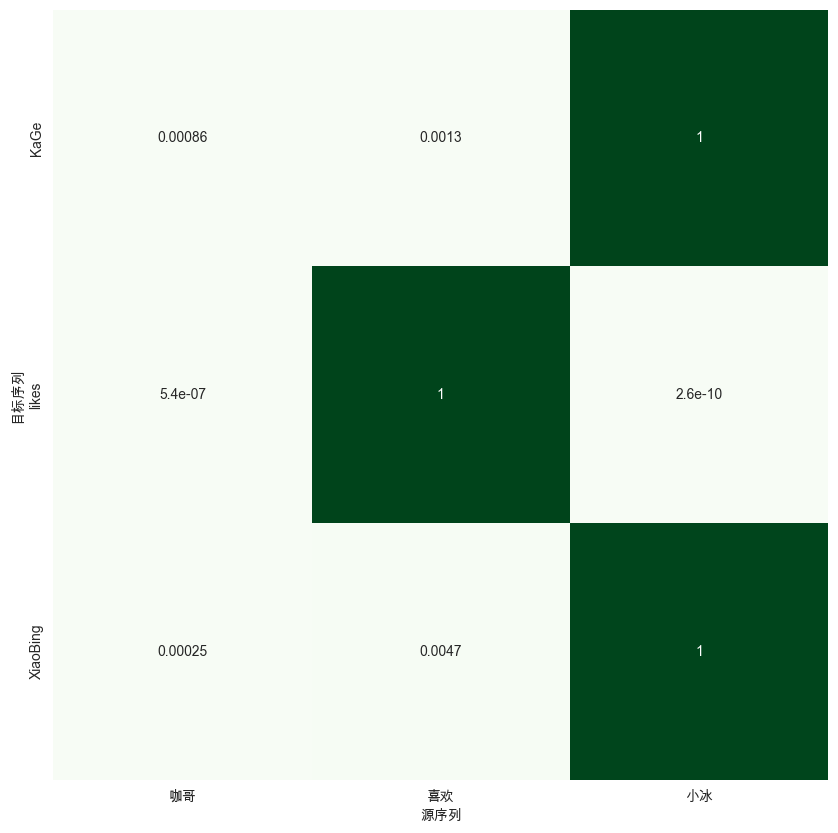

自然 语言 处理 很 强大 -> ['NLP', 'is', 'XiaoBing', 'powerful', '<eos>']


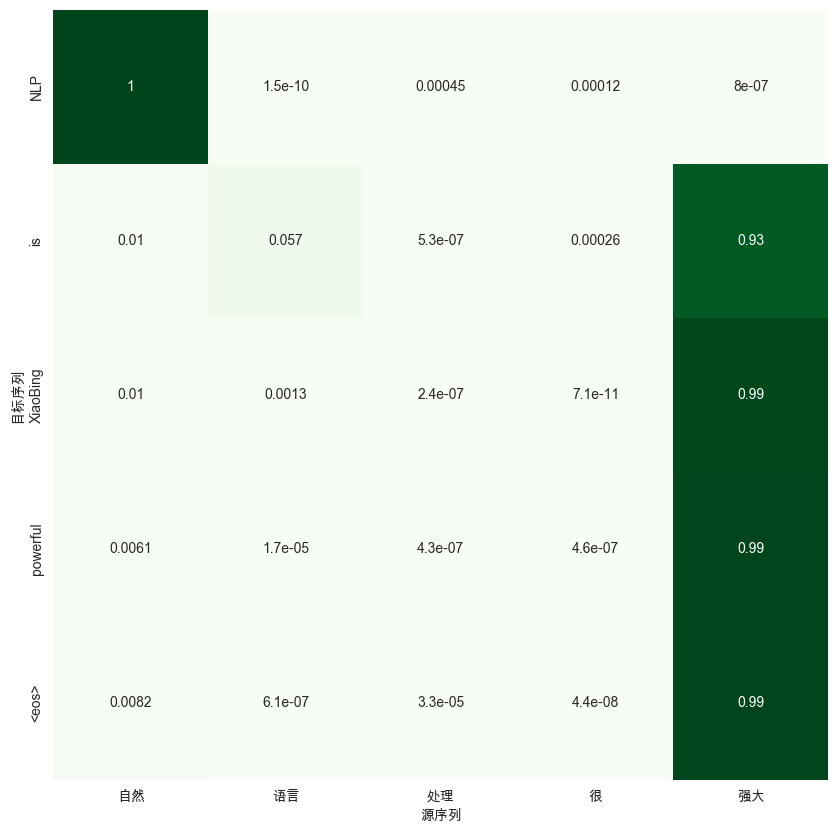

In [11]:
def test_seq2seq(model, source_sentence):
    encoder_input = np.array([[word_2_idx_cn[w] for w in source_sentence.split()]])
    decoder_input = np.array([word_2_idx_en["<sos>"]] + [word_2_idx_en["<eos>"]]*(len(encoder_input[0])-1))
    encoder_input = torch.LongTensor(encoder_input)
    decoder_input = torch.LongTensor(decoder_input).unsqueeze(0)
    hidden = torch.zeros(1, encoder_input.size(0), n_hidden)
    predict,  attn_weights = model(encoder_input, hidden, decoder_input)
    predict = predict.data.max(2, keepdim=True)[1]
    print(f"{source_sentence} -> {[idx_2_word_en[n.item()] for n in predict.squeeze()]}")
    attn_weights = attn_weights.squeeze(0).detach().numpy()
    visualize_attention(source_sentence, [idx_2_word_en[n.item()] for n in predict.squeeze()], attn_weights)

test_seq2seq(model, "咖哥 喜欢 小冰")
test_seq2seq(model, "自然 语言 处理 很 强大")